In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Bitcoin_data = pd.read_csv(r"C:\Users\admin\Desktop\Practice Assignment for Python\bitcoin_price_Training - Training.csv")
Bitcoin_data.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"


# Data Cleaning

In [3]:
# checking rows and coloumn count
print(f"In dataset Rows & Columns has : ", Bitcoin_data.shape)

# Checking duplicate values in dataset
print(f"The duplicate Vaues is :",Bitcoin_data.duplicated().sum())

# Find out missing values 
missing_data = Bitcoin_data.isnull().sum()
print(f"The Missing Values are below : \n{missing_data}")

# checking datatypes all correct
Bitcoin_data.dtypes

# changing datatype of dataset
# convert Date to datetime format
Bitcoin_data['Date']=pd.to_datetime(Bitcoin_data['Date'])

# # convert numeric column
Bitcoin_data['Volume']=Bitcoin_data['Volume'].str.replace( ',', '', regex=True)
Bitcoin_data['Market Cap']=Bitcoin_data['Market Cap'].str.replace(',', '', regex=True)

# Replace '-' with 0 (or you can drop such rows using .dropna())
Bitcoin_data['Volume'] = Bitcoin_data['Volume'].replace('-', '0').astype(int)
Bitcoin_data['Market Cap'] = Bitcoin_data['Market Cap'].replace('-', '0').astype(int)

# convert price related column to float
cols = ['Open','High', 'Low', 'Close']
Bitcoin_data[cols]=Bitcoin_data[cols].astype(float)

print(f"This After changing datatypes are below :\n{Bitcoin_data.dtypes}")

Bitcoin_data.head(4)


In dataset Rows & Columns has :  (1556, 7)
The duplicate Vaues is : 0
The Missing Values are below : 
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64
This After changing datatypes are below :
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Market Cap             int64
dtype: object


,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000


# 1.Analyse change of price in bitcoin overtime

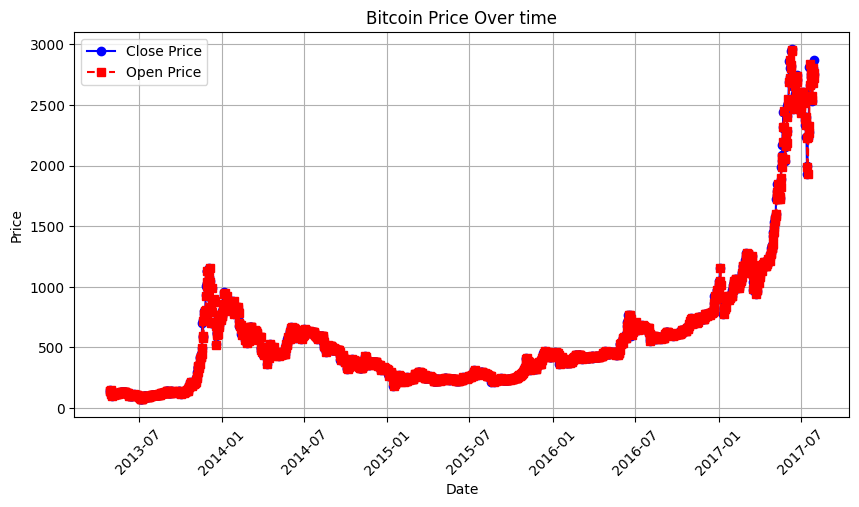

In [4]:
# sort date in Ascending order
sort = Bitcoin_data.sort_values("Date")

# Plot Bitcoin price change over time
plt.figure(figsize=(10,5))
plt.plot(Bitcoin_data["Date"],Bitcoin_data["Close"], marker="o",linestyle="-", color="b", label = "Close Price")
plt.plot(Bitcoin_data["Date"], Bitcoin_data["Open"], marker="s", linestyle="--", color="r", label="Open Price")


plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin Price Over time")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


# 2. Analysing bitcoin prices using candle stick chart

G:\Python software\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


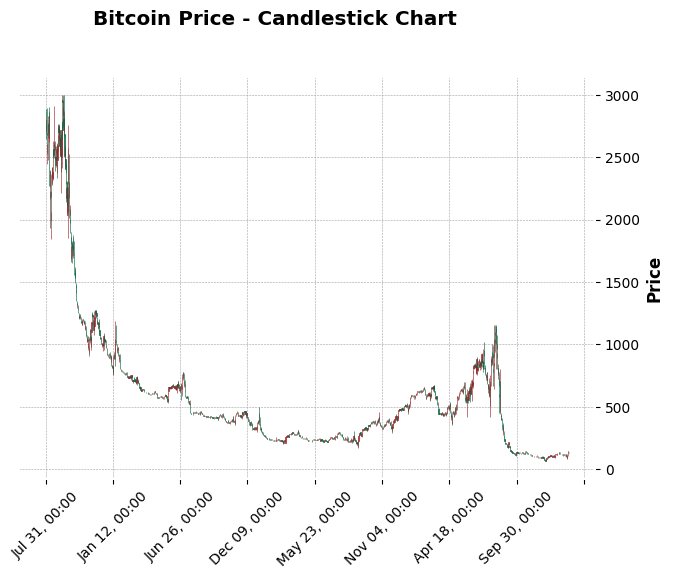

In [6]:
import pandas as pd
# !pip install mplfinance
import mplfinance as mpf

# ✅ Make sure Date column is datetime and set as index
Bitcoin_data["Date"] = pd.to_datetime(Bitcoin_data["Date"])
Bitcoin_data.set_index("Date", inplace=True)

# ✅ Select required columns
ohlc = Bitcoin_data[['Open', 'High', 'Low', 'Close']]

# ✅ Plot candlestick chart
mpf.plot(ohlc, type='candle', style='charles', title='Bitcoin Price - Candlestick Chart', ylabel='Price', volume=False)


# 3.Analysing closing price in depth

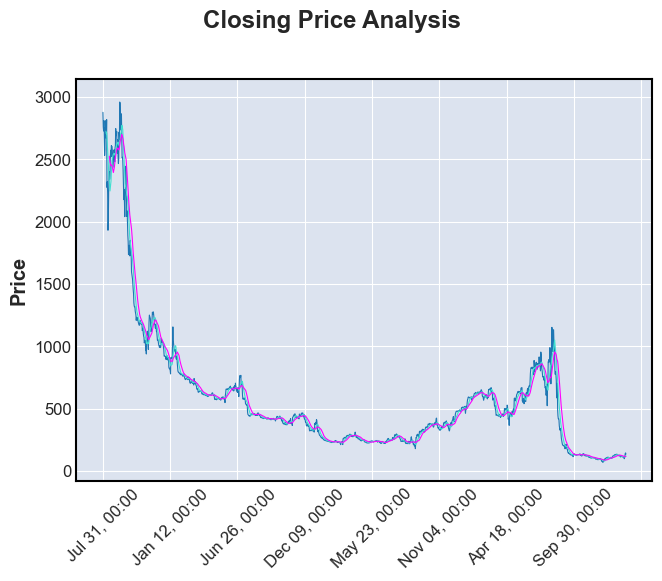

In [7]:
mpf.plot(Bitcoin_data, type='line', mav=(10, 20), title='Closing Price Analysis')


# 4. Perform analysis on closing price on yearly quarterly and monthly basis

C:\Users\admin\AppData\Local\Temp\ipykernel_4540\1231350844.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = Bitcoin_data['Close'].resample('Y').mean()
C:\Users\admin\AppData\Local\Temp\ipykernel_4540\1231350844.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = Bitcoin_data['Close'].resample('Q').mean()
C:\Users\admin\AppData\Local\Temp\ipykernel_4540\1231350844.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = Bitcoin_data['Close'].resample('M').mean()


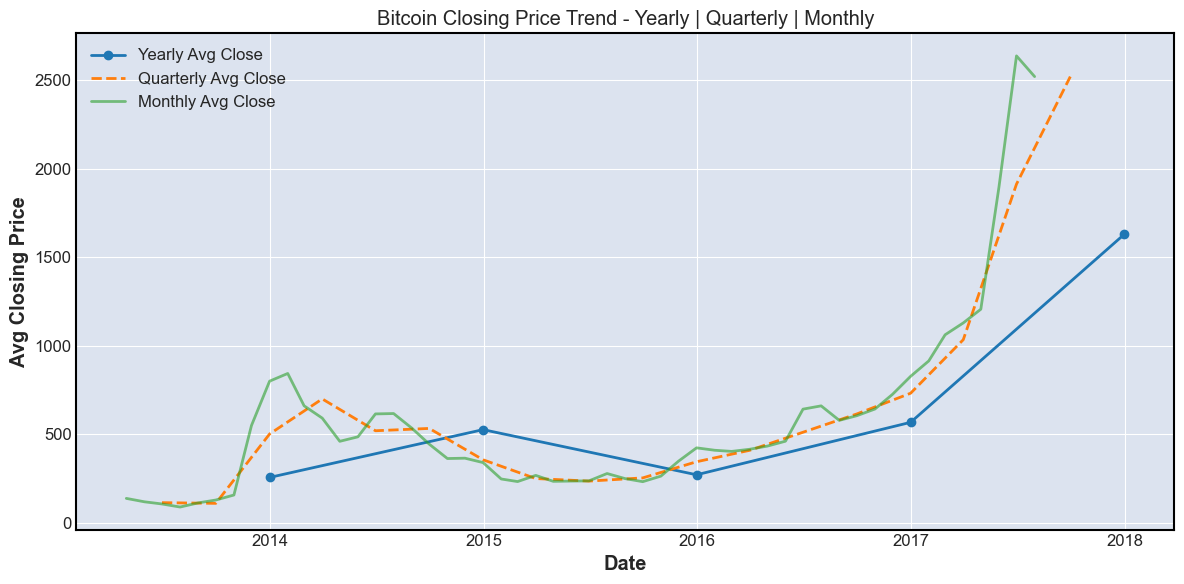

In [8]:
# Grouping closing prices
yearly = Bitcoin_data['Close'].resample('Y').mean()
quarterly = Bitcoin_data['Close'].resample('Q').mean()
monthly = Bitcoin_data['Close'].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(yearly, label='Yearly Avg Close', marker='o')
plt.plot(quarterly, label='Quarterly Avg Close', linestyle='--')
plt.plot(monthly, label='Monthly Avg Close', alpha=0.6)

plt.title('Bitcoin Closing Price Trend - Yearly | Quarterly | Monthly')
plt.xlabel('Date')
plt.ylabel('Avg Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Analysing daily change in price of stocks

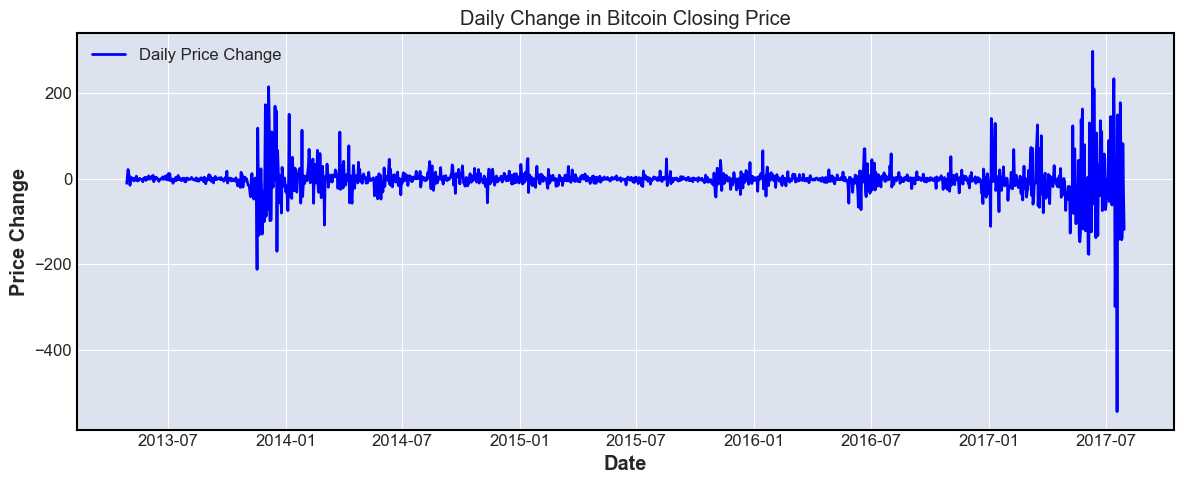

In [9]:
# 📌 Calculate daily change (difference)
Bitcoin_data['Daily Change'] = Bitcoin_data['Close'].diff()

# 📊 Plot daily change
plt.figure(figsize=(12, 5))
plt.plot(Bitcoin_data['Daily Change'], label='Daily Price Change', color='blue')
plt.title('Daily Change in Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


